In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the data using pandas and make a copy
df = pd.read_csv('../datasets/views/2020/data-us-2020.csv', na_values='?', comment = '\t', sep=',', skipinitialspace=True)

data = df.copy()

# Dropping Country column as it is all US data in this file
data.drop(['Country'], axis=1, inplace=True)

In [5]:
data.sample(15)

,ConvertedComp,EdLevel,YearsCode,YearsCodePro
4661,35000.0,3,15,11
5458,200000.0,8,20,20
2068,100000.0,6,8,2
5614,135000.0,6,20,10
7305,218000.0,8,33,16
6190,202500.0,5,23,14
7,80000.0,5,1,0
7044,180000.0,6,30,22
3035,175000.0,6,10,10
2601,67000.0,4,10,0


In [6]:
# Creating the features matrix
X = data.drop('ConvertedComp', axis=1)

# Creating the labels
y = data['ConvertedComp']

In [7]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

In [8]:

# splitting into training and testing data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# Fitting the model to the data
model = RandomForestRegressor(n_estimators=130)
model.fit(X_train, y_train);
model.score(X_test, y_test)

0.06450890253049724

In [10]:
app_test = model.predict([[1,1,1]])
app_test

array([52167.05586081])

In [11]:
# Making a prediction
# y_label = regr.predict(np.array([0, 2, 3, 4]))

In [12]:
y_preds = model.predict(X_test)
y_preds

array([112180.05345134, 147707.96703297, 241649.78493728, ...,
       109157.07076033,  87883.46923077,  99762.88119148])

In [13]:
y_test

2684    150000.0
6383    105000.0
5891    180000.0
6358    140000.0
5374     72000.0
          ...   
88       85000.0
734     120000.0
196     150000.0
7652     70000.0
3002     54000.0
Name: ConvertedComp, Length: 1670, dtype: float64

In [14]:
# Evaluating this model on the training data and the test data
model.score(X_train, y_train)

0.480003741472652

In [15]:
model.score(X_test, y_test)

0.06450890253049724

In [16]:
random_forest_regressor_results = '{:.2f}'.format(model.score(X_test, y_test) * 100)

In [17]:
np.random.seed(42)
for i in range(10, 200, 10):
    print(f'Trying model with {i} estimators...')
    model = RandomForestRegressor(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {model.score(X_test, y_test) * 100}%')
    print(' ')

Trying model with 10 estimators...
Model accuracy on test set: 1.6084603066399583%
 
Trying model with 20 estimators...
Model accuracy on test set: 5.418700186716374%
 
Trying model with 30 estimators...
Model accuracy on test set: 4.175144600452652%
 
Trying model with 40 estimators...
Model accuracy on test set: 6.4760175070528785%
 
Trying model with 50 estimators...
Model accuracy on test set: 6.453339986167739%
 
Trying model with 60 estimators...
Model accuracy on test set: 5.58218181541863%
 
Trying model with 70 estimators...
Model accuracy on test set: 5.850301999750885%
 
Trying model with 80 estimators...
Model accuracy on test set: 5.595028883899744%
 
Trying model with 90 estimators...
Model accuracy on test set: 6.306602306365006%
 
Trying model with 100 estimators...
Model accuracy on test set: 7.112772327980165%
 
Trying model with 110 estimators...
Model accuracy on test set: 6.335937201862507%
 
Trying model with 120 estimators...
Model accuracy on test set: 6.1790571

# Working with different estimators

In [18]:
# ml map shows to try lasso or elasticnet if few features are important
from sklearn import linear_model

np.random.seed(42)

# Creating the features matrix
X = data.drop('ConvertedComp', axis=1)

# Creating the labels
y = data['ConvertedComp']

# splitting into training and testing data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate Lasso
lassoreg = linear_model.Lasso(normalize=True)
lassoreg.fit(X_train, y_train);

lasso_results = '{:.2f}'.format(lassoreg.score(X_test, y_test) * 100)
# Default calculates to a score of 17.644
#normalize=True improved score to 17.654
lassoreg.score(X_test, y_test) * 100

17.65440771812412

In [19]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

np.random.seed(42)

# Creating the features matrix
X = data.drop('ConvertedComp', axis=1)

# Creating the labels
y = data['ConvertedComp']

# splitting into training and testing data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model2 = ElasticNet(alpha=0.2)
model2.fit(X_train, y_train)

elasticnet_results = '{:.2f}'.format(model2.score(X_test, y_test) * 100)
# Default calculates to a score of 17.533
# alpha of 0.2 increased score to 17.6559; max_iter, l1_ration no gains; fit_intercept, normalize decreased score
model2.score(X_test, y_test)

0.17655903549086893

### ml map shows to try ridgeregression or SVR kernel linear if few features are important

In [20]:
# RidgeRegression
from sklearn.linear_model import Ridge

np.random.seed(42)

# Creating the features matrix
X = data.drop('ConvertedComp', axis=1)

# Creating the labels
y = data['ConvertedComp']

# splitting into training and testing data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate Ridge
regr3 = Ridge()
regr3.fit(X_train, y_train)


ridge_results = '{:.2f}'.format(regr3.score(X_test, y_test) * 100)
# Default calculates to a score of 17.644
#normalize=True, fit_intercept=False decreased score, tol no impact
regr3.score(X_test, y_test)

0.1764423461756297

In [21]:
# SVR kernel='linear'
from sklearn import svm

np.random.seed(42)

# Creating the features matrix
X = data.drop('ConvertedComp', axis=1)

# Creating the labels
y = data['ConvertedComp']

# splitting into training and testing data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate Support Vector Machines (SVM)
svr_linear = svm.SVR(kernel='linear')
svr_linear.fit(X_train, y_train)

svrkernellinear_results = '{:.2f}'.format(svr_linear.score(X_test, y_test) * 100)
svr_linear.score(X_test, y_test)

0.14014883948079182

In [22]:
# ml map shows to try SVR kernel rbf or ensembleregressors if nothing else worked

In [23]:
# SVR kernel='rbf'
from sklearn import svm

np.random.seed(42)

# Creating the features matrix
X = data.drop('ConvertedComp', axis=1)

# Creating the labels
y = data['ConvertedComp']

# splitting into training and testing data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate Random Forest Regressor
svr_rbf = svm.SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)

svrkernelrbf_results = '{:.2f}'.format(svr_rbf.score(X_test, y_test) * 100)
svr_rbf.score(X_test, y_test)

-0.018659878833494847

In [24]:
# EnsembleRegressors
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Creating the features matrix
X = data.drop('ConvertedComp', axis=1)

# Creating the labels
y = data['ConvertedComp']

# splitting into training and testing data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf_results = '{:.2f}'.format(rf.score(X_test, y_test) * 100)
rf.score(X_test, y_test)

0.062172198735375606

In [25]:
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# Creating the features matrix
X = data.drop('ConvertedComp', axis=1)

# Creating the labels
y = data['ConvertedComp']

# splitting into training and testing data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate Random Forest Regressor
lreg = LinearRegression()
lreg.fit(X_train, y_train)

lreg_results = '{:.2f}'.format(lreg.score(X_test, y_test) * 100)
# Default calculates to a score of 17.644
# fit_intercept decreased score, normalize had no impact
lreg.score(X_test, y_test)

0.176441938103564

In [26]:
# trying svc linear classification
from sklearn import svm

np.random.seed(42)

# Creating the features matrix
X = data.drop('ConvertedComp', axis=1)

# Creating the labels
y = data['ConvertedComp']

# splitting into training and testing data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate Random Forest Regressor
svcc = svm.SVC()
svcc.fit(X_train, y_train)

svcc.score(X_test, y_test)
svc_linear_classification_results = '{:.2f}'.format(svcc.score(X_test, y_test) * 100)

In [27]:
svcc.predict([[4, 10, 10]])

array([120000.])

In [28]:
svcc.predict([[1, 3, 3]])

array([75000.])

# Ranked results of the above estimators

In [29]:
print('Ranked Results based on score of test set:')
print(f'Elastic Net: {elasticnet_results}%')
print(f'Lasso: {lasso_results}%')
print(f'Ridge: {ridge_results}%')
print(f'Linear Regression: {lreg_results}%')
print(f'SVR Linear: {svrkernellinear_results}%')
print(f'SVC Linear Classification: {svc_linear_classification_results}%')
print(f'Random Forest Regressor: {random_forest_regressor_results}%')
print(f'Random Forest Regressor run 2: {rf_results}%')

print(f'SVR Kernel "rbf": {svrkernelrbf_results}%')



Ranked Results based on score of test set:
Elastic Net: 17.66%
Lasso: 17.65%
Ridge: 17.64%
Linear Regression: 17.64%
SVR Linear: 14.01%
SVC Linear Classification: 4.25%
Random Forest Regressor: 6.45%
Random Forest Regressor run 2: 6.22%
SVR Kernel "rbf": -1.87%


In [30]:
import pickle

pickle.dump(model2, open('model2.pkl', 'wb'))

In [31]:
loaded_model = pickle.load(open('model2.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.17655903549086893

In [32]:
model2.predict([[0, 0, 0]])

array([50450.69085167])

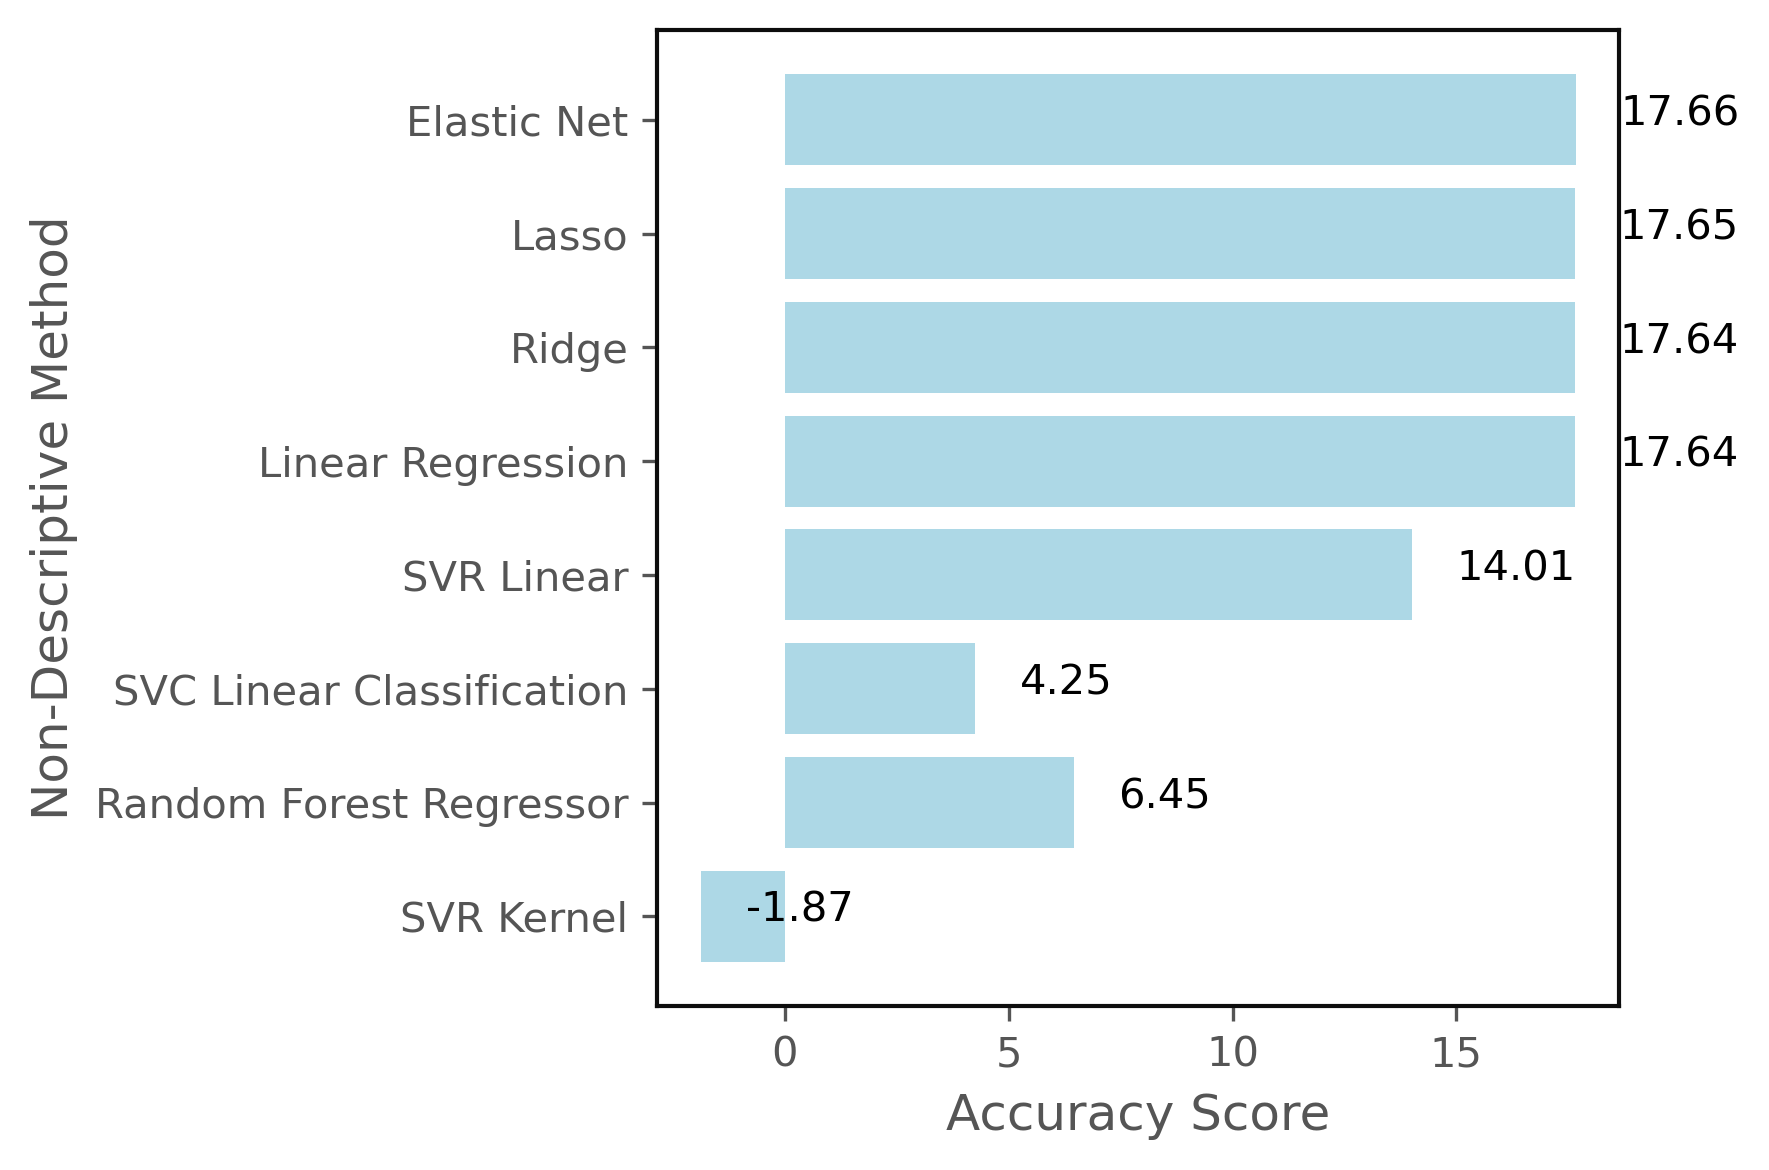

In [109]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(6,4), dpi=300)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = '0.05'

elasticnet_results = float(elasticnet_results)
lasso_results = float(lasso_results)
ridge_results = float(ridge_results)
lreg_results = float(lreg_results)
svrkernellinear_results = float(svrkernellinear_results)
svc_linear_classification_results = float(svc_linear_classification_results)
random_forest_regressor_results = float(random_forest_regressor_results)
svrkernelrbf_results = float(svrkernelrbf_results)

methods = ('Elastic Net', 'Lasso', 'Ridge', 'Linear Regression', 'SVR Linear', 'SVC Linear Classification', 'Random Forest Regressor', 'SVR Kernel')

scores = (elasticnet_results, lasso_results, ridge_results, lreg_results, svrkernellinear_results, svc_linear_classification_results, random_forest_regressor_results, svrkernelrbf_results)

for i, v in enumerate(scores): 
    plt.text(v + 1, i + .05, str(v),  
            color = 'black') 
    
plt.barh(methods, scores, color='lightblue')
plt.gca().invert_yaxis()
plt.ylabel('Non-Descriptive Method')
plt.xlabel('Accuracy Score')
plt.tight_layout()
plt.savefig('non-descriptive-analysis.png')

<Figure size 2400x2400 with 0 Axes>

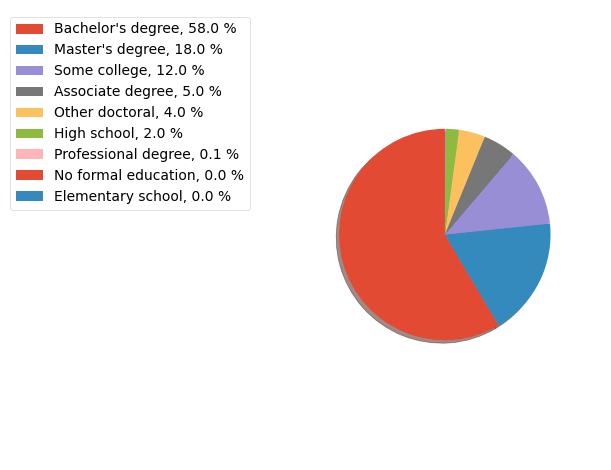

In [152]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8,8), dpi=300)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "Bachelor's degree", "Master's degree", "Some college", "Associate degree", "Other doctoral", "High school", "Professional degree", "No formal education", "Elementary school"      
sizes = [58, 18, 12, 5, 4, 2, .05, .04, .03]
# explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()

ax1.pie(sizes, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc="best", bbox_to_anchor=(-0.1, 1.), labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, sizes)])
plt.tight_layout()
plt.savefig('education-level-analysis.png')